# Exercise 2 | TKO_2096 Application of Data Analysis 2022

#### Prediction of the metal ion content from multi-parameter data <br>
- Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), for each sample using number of neighbors k = 3.<br> <br>

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html
    - The data should be standarized using z-score. (Using sklearn.preprocessing.StandardScaler is allowed)
    - Implement your own Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement your own Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Return your solution as a Jupyter Notebook file (include your full name in the file name).
    - Submit to moodle your solution on ** Sunday 6 of February** at the latest.

## Import libraries

In [13]:
#In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

## Read and visualize the dataset

In [11]:
#In this cell read the file Water_data.csv
df = pd.read_csv('data/Water_data.csv')
#Print the dataset dimesions (i.e. number of rows and columns)
print(df.shape)
#Print the first 5 rows of the dataset
df.head()

(268, 6)


,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,200,40.0,160.0,161962,15145,62580
1,50,50.0,0.0,223761,24903,146178
2,20,8.0,12.0,12939,133,108785
3,50,30.0,20.0,49520,2261,210270
4,1000,200.0,800.0,172842,2668,8762


#### To show understanding of the data, answer the following questions:
- How many different mixtures of Cadmium (Cd) and Lead (Pb) were measured? <br>
67
- How many total concentrations (c_total) were measured? <br>
12
- How many mixtures have less than 4 replicas? <br>
0
- Make plots of Lead (Pb) and Cadmium (Cd) mixtures for low and high concentrations. <br>
Where low concentrations are those with c_total <= 100, while in high concentration c_total > 100.<br>
Hint: plots are similar to the ones presented in the video lecture.  

(67, 2)
(12, 1)
0


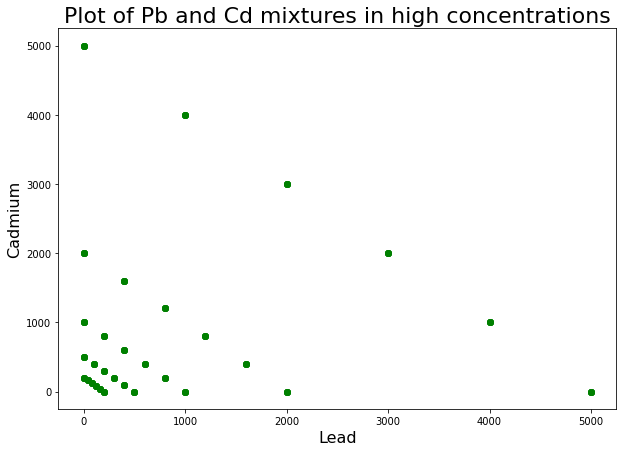

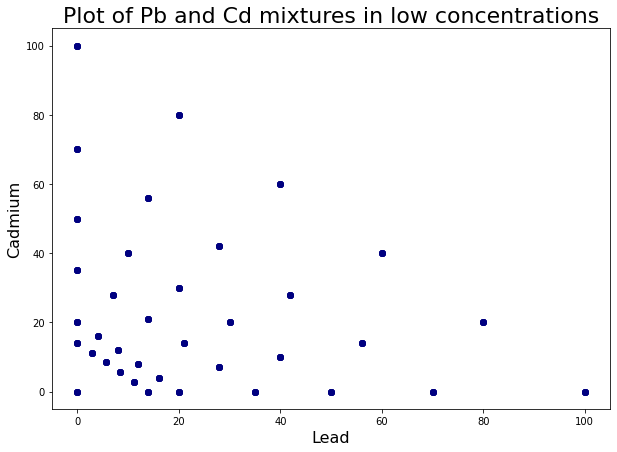

In [3]:
#In this cell write the code to answer the previous questions and print the answers.
print(df[['Cd', 'Pb']].drop_duplicates().shape)
print(df[['c_total']].drop_duplicates().shape)

d_total = 0
for index, row in df.iterrows():
    cd1 = row['Cd']
    pb1 = row['Pb']
    d_amount = 0
    d_boolean = False
    for index, row in df.iterrows():
        cd2 = row['Cd']
        pb2 = row['Pb']
        if cd1 == cd2 and pb1 == pb2:
            d_boolean = True
            d_amount =+ 1
            if d_amount < 4:
                d_boolean = False
                break
    if d_boolean:
        d_total =+ 1

print(d_total)

low_c = df[df.c_total <= 100]
high_c = df[df.c_total > 100]

plt.figure(figsize=(10,7))
plt.title("Plot of Pb and Cd mixtures in high concentrations", fontsize=22)
plt.xlabel("Lead", fontsize=16)
plt.ylabel("Cadmium", fontsize=16)
plt.scatter(high_c['Pb'], high_c['Cd'], color='green')
plt.show()

plt.figure(figsize=(10,7))
plt.title("Plot of Pb and Cd mixtures in low concentrations", fontsize=22)
plt.xlabel("Lead", fontsize=16)
plt.ylabel("Cadmium", fontsize=16)
plt.scatter(low_c['Pb'], low_c['Cd'], color='navy')
plt.show()

## Standardization of the dataset

In [24]:
#Standardize the dataset features by removing the mean and scaling to unit variance. 
#In other words, use z-score to scale the dataset features (Mod1, Mod2, Mod3) 
#Print the 5 first samples (i.e. rows) of the scaled dataset

temp_mod = df[['Mod1', 'Mod2', 'Mod3']]

sc = StandardScaler()
mod = pd.DataFrame(sc.fit_transform(temp_mod))
mod.columns = ['Mod1','Mod2','Mod3']

#print(mod.head())

cT = df['c_total']
Cd = df['Cd']
Pb = df['Pb']
df2 = pd.concat([cT, Cd, Pb, mod], axis = 1)

print(df2.head())

   c_total     Cd     Pb      Mod1      Mod2      Mod3
0      200   40.0  160.0  0.593817  0.648476 -0.515882
1       50   50.0    0.0  1.230478  1.505017  0.835592
2       20    8.0   12.0 -0.941438 -0.669253  0.231084
3       50   30.0   20.0 -0.564576 -0.482460  1.871725
4     1000  200.0  800.0  0.705904 -0.446735 -1.385922


## C-index code 

In [25]:
def cindex(true_labels, pred_labels):
    n = 0
    h_num = 0 
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5 
    cindx = h_num  /n
    return cindx

In [26]:
#test cindex function with following values
true_labels = [-1, 1, 1, -1, 1]
predictions = [0.60, 0.80, 0.75, 0.75, 0.70]
cindx = cindex(true_labels, predictions)
print(cindx)

0.75


## Functions

In [27]:
#Include here all the functions that you need to run in the data analysis part.
def loo_cindex(X, y):

    preds = []
    X2 = X.copy()
    y2 = y.copy()
    
    for i in range(0, len(X2)):

        X_train = X2.drop([i])
        y_train = y2.drop([i])
        X_test = (np.asarray(X2.loc[i][:])).reshape(1, -1)

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train.values, y_train)
        pred = knn.predict(X_test)
        preds.append(pred)
        
    return cindex(y2, preds)

In [33]:
# Function lro_cindex assumes the data given as parameters is sorted
def lro_cindex(data, el1, el2, X, y):

    # Lists for folds, training set and predictions and also an indexer
    folds = []
    trains = []
    preds = []
    i = 0
    # Loop through the given data
    while i < len(data):
        # Save the current row
        tmp1 = el1[i]
        tmp2 = el2[i]
        # Initialize replicate rows counter
        replicates = 0
        # Check for replicated rows, if none: break loop
        for j in range(i, len(data)):
            if el1[j] == tmp1 and el2[j] == tmp2:
                replicates += 1
            else:
                break
        # Add saved rows to folds
        folds.append(data.loc[i: i + replicates - 1])
        # Remove the rows from the training set
        rem = list(range(i, i + replicates))
        trains.append(data.drop(rem))
        # Skip the replica rows
        i += replicates

    for i in range(0, len(data)):
        # This is for edge cases when the test set is one of the last rows
        try:
            train_all = trains[i]
            fold_all = folds[i]
        except:
            pass
        # Parameters should be: X = Mod1, Mod2, Mod3; y = 'c_tota'l/'Cd'/'Pb'
        x_train = train_all[list(X)] 
        y_train = train_all[(y)] 
        x_test = fold_all[list(X)]
        # kNN
        knn = KNeighborsRegressor(n_neighbors = 3) 
        knn.fit(x_train, y_train)
        pred = knn.predict(x_test)
        preds.extend(pred)
    # Return C-index score for prections
    return(cindex(data[(y)],preds))

## Results for Leave-One-Out cross-validation

In [30]:
#In this cell write your own code for leave-One-Out cross-validation and print the corresponding results. 
#Note: using a leave-one-out cross-validation from an already made package (e.g. Scikit-learn) is not accepted.
print('C-index for total concentration using LOOCV: ', loo_cindex(df[['Mod1', 'Mod2', 'Mod3']],  df['c_total']))
print('C-index for Cd concentration using LOOCV:    ', loo_cindex(df[['Mod1', 'Mod2', 'Mod3']],  df['Cd']))
print('C-index for Pb concentration using LOOCV:    ', loo_cindex(df[['Mod1', 'Mod2', 'Mod3']],  df['Pb']))

C-index for total concentration using LOOCV:  0.8902431573802542
C-index for Cd concentration using LOOCV:     0.8927877824858758
C-index for Pb concentration using LOOCV:     0.8753383945386064


## Results for Leave-Replicas-Out cross-validation

In [34]:
#In this cell run your script for leave-Replicas-Out cross-validation and print the corresponding results.

# Sort the data and save the labels
df3 = df2.sort_values(by = ['Cd', 'Pb'])
df3 = df3.reset_index(drop = True)
Cd2 = df3['Cd']
Pb2 = df3['Pb']
labels = ['Mod1','Mod2','Mod3']

print('C-index for total concentration using LROCV: ', lro_cindex(df3, Cd2, Pb2, labels, 'c_total'))
print('C-index for Cd concentration using LROCV:    ', lro_cindex(df3, Cd2, Pb2, labels, 'Cd'))
print('C-index for Pb concentration using LROCV:    ', lro_cindex(df3, Cd2, Pb2, labels, 'Pb'))

C-index for total concentration using LROCV:  0.8231152248289345
C-index for Cd concentration using LROCV:     0.753545786252354
C-index for Pb concentration using LROCV:     0.7628589924670434


## Interpretation of results
#### Answer the following questions based on the results obtained
- Which cross-validation approach had more optimistic results?
- Which cross-validation generalize better on unseen data? Why?

(Writing on a code block seems weird so I changed it to a markdown block)

Based on the C-index results, the LOOCV approach had more optimistic results and therefore was better at ranking the data to correct order.

However, our data has multiple replicas and using LROCV would therefore be a more realistic approach as it gives more realistic predictions.
This also means it generalizes better on unseen data.